<a href="https://colab.research.google.com/github/anabellatus/PCVK_Ganjil_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tugas Praktikum

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”.

Import Folder

In [1]:
from google.colab import drive

# accessing my Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Library

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob



```
# This is formatted as code
```

3. Histogram lena.jpg

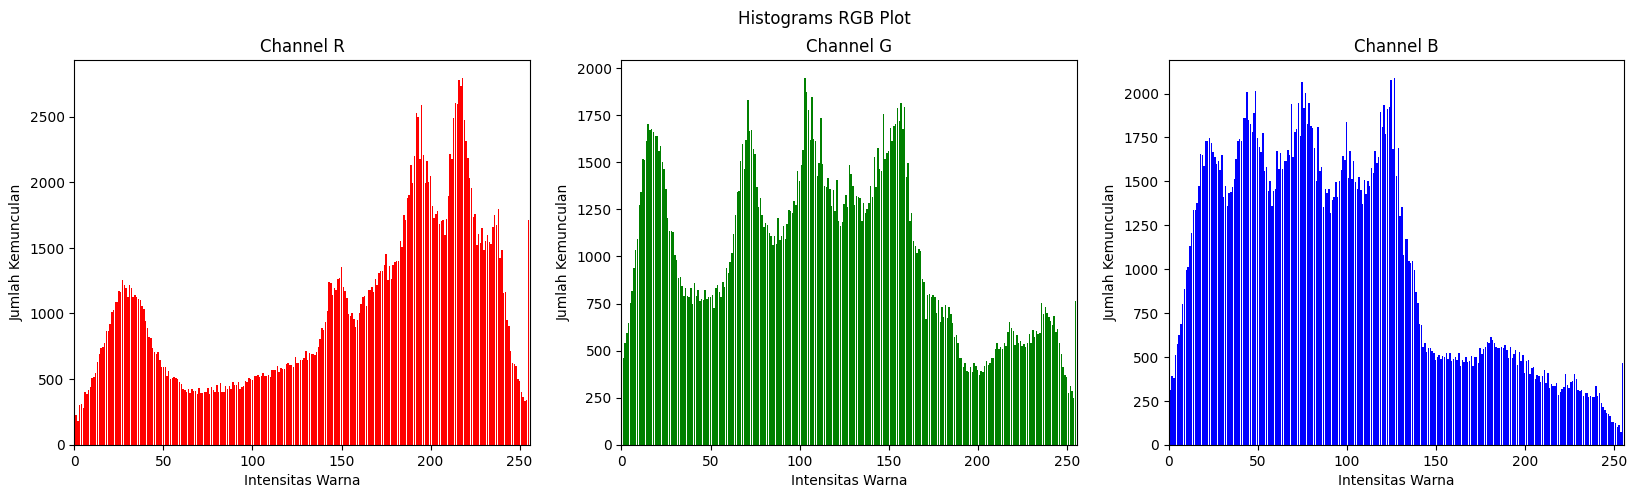

In [3]:
lena_original = cv.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/lena.jpg')

colors = ('r', 'g', 'b')  # Warna untuk setiap channel

plt.figure(figsize=(20, 5))
plt.suptitle('Histograms RGB Plot')

for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)
    hist = cv.calcHist([lena_original], [2-i], None, [256], [0, 256])
    plt.bar(np.arange(256), hist[:,0], color=color)
    plt.xlim([0, 256])
    plt.title(f'Channel {color.upper()}')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

# Menampilkan plot hitogram
plt.show()


4. Menggunakan Numpy Library

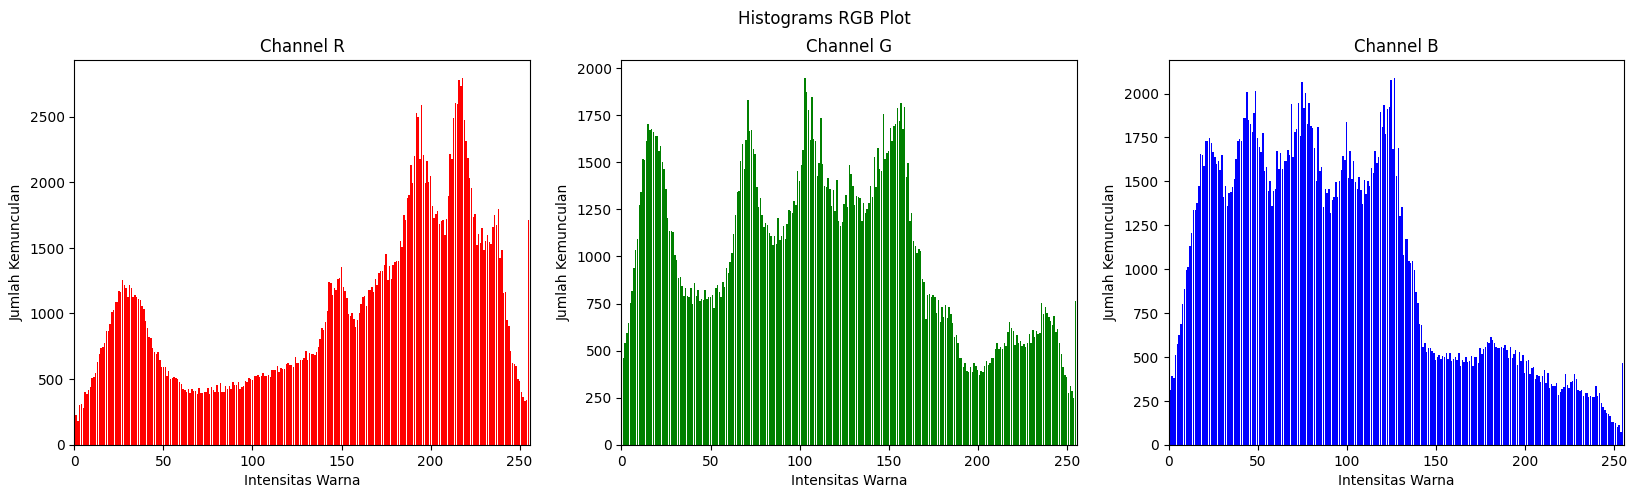

In [4]:
colors = ('r', 'g', 'b')  # Warna untuk setiap channel

plt.figure(figsize=(20, 5))
plt.suptitle('Histograms RGB Plot')

for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)
    hist, bins = np.histogram(lena_original[:, :, 2-i].flatten(), bins=256, range=(0, 256))
    plt.bar(bins[:-1], hist, color=['red', 'green', 'blue'][i])
    plt.xlim([0, 256])
    plt.title(f'Channel {color.upper()}')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

# Menampilkan plot hitogram dengan Numpy
plt.show()


5. Histogram Equalization

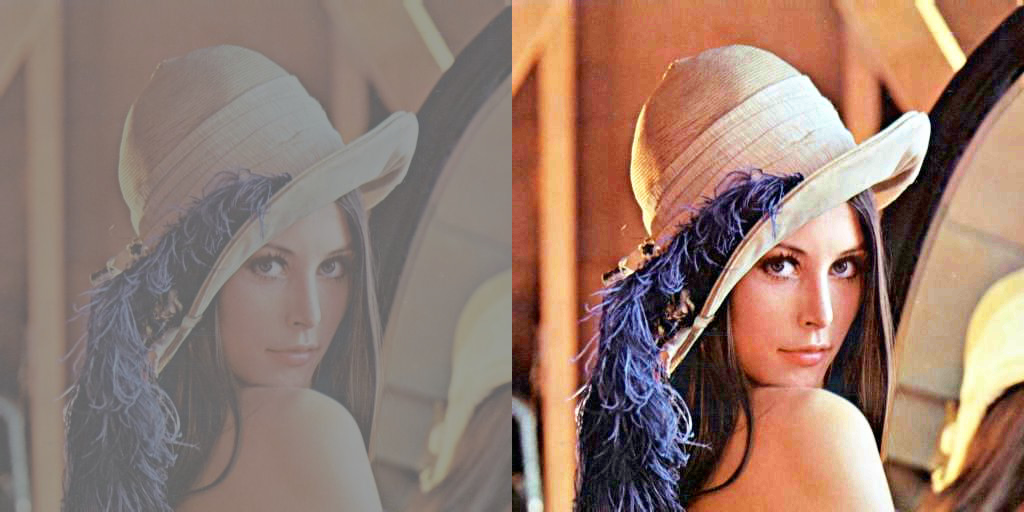

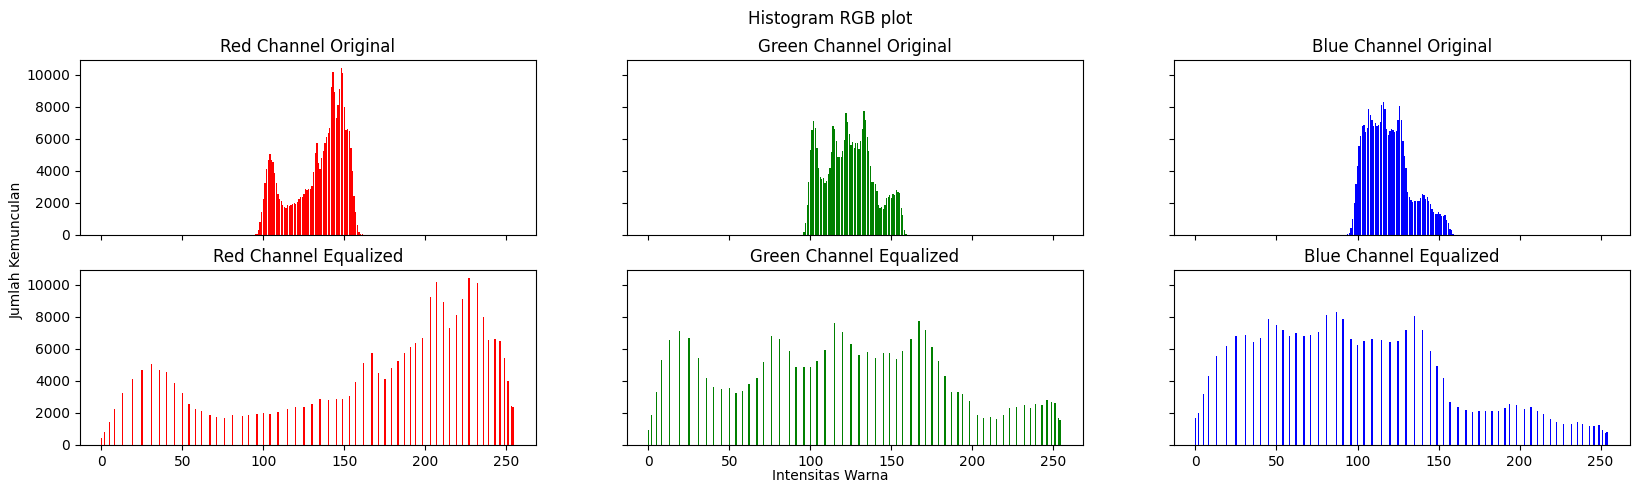

In [6]:
lena_lc_original = cv.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/lena_lc.jpg')

r, g, b = cv.split(lena_lc_original)

def histogram(img_lena_lc):
  height, width, depth = np.shape(img_lena_lc)
  hist = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      hist[0][img_lena_lc[y][x][0]] += 1
      hist[1][img_lena_lc[y][x][1]] += 1
      hist[2][img_lena_lc[y][x][2]] += 1
  return hist

real_histogram = histogram(lena_lc_original)

img_array = np.asarray(lena_lc_original)

histogram_array = np.bincount(img_array.flatten(), minlength=256)

num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

chistogram_array = np.cumsum(histogram_array)
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)
img_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
equalized_image = eq_img_array

equal_histo = histogram(equalized_image)

final_frame = cv.hconcat((lena_lc_original, equalized_image))
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.all(b == g) and np.all(g == r)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, real_histogram[2], color='red')
  axs[0, 0].set_title('Red Channel Original')
  axs[0,1].bar(names, real_histogram[1], color='green')
  axs[0, 1].set_title('Green Channel Original')
  axs[0,2].bar(names, real_histogram[0], color='blue')
  axs[0, 2].set_title('Blue Channel Original')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,0].set_title('Red Channel Equalized')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,1].set_title('Green Channel Equalized')
  axs[1,2].bar(names, equal_histo[0], color='blue')
  axs[1,2].set_title('Blue Channel Equalized')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, real_histogram[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

6. Histogram Equalization dengan library numpy equalizeHist

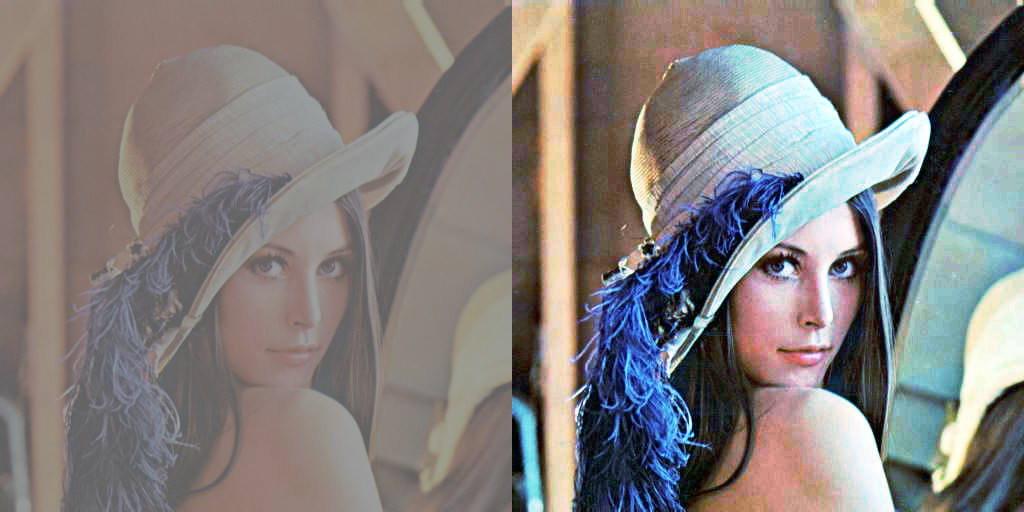

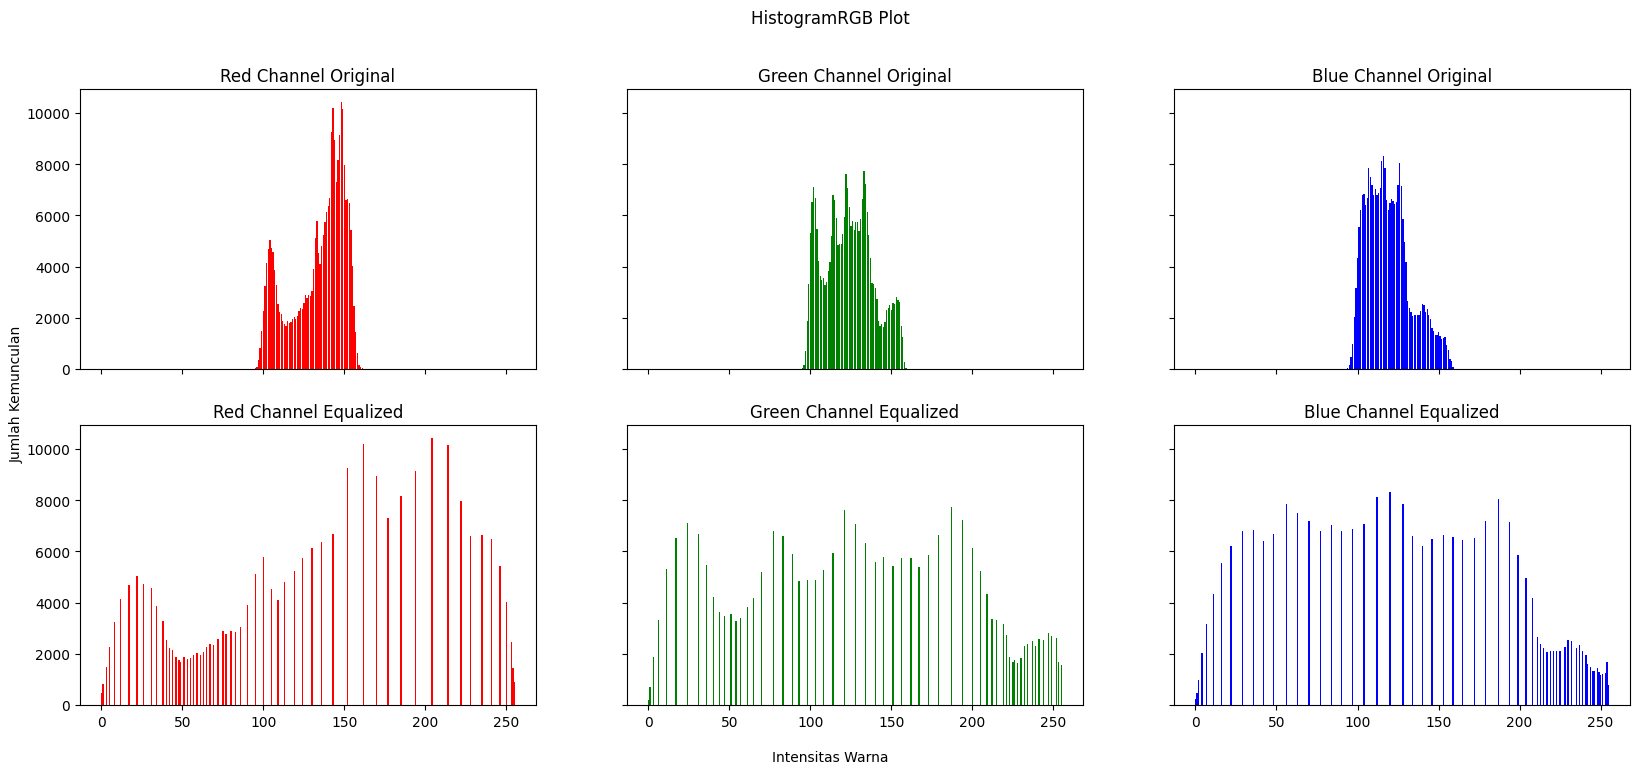

In [7]:
lena_lc_original = cv.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/lena_lc.jpg')

b, g, r = cv.split(lena_lc_original)

r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

equalized_img = cv.merge((b_eq, g_eq, r_eq))

final_frame = cv.hconcat((lena_lc_original, equalized_img))
cv2_imshow(final_frame)

def histogram(img):
    height, width, _ = np.shape(img)
    hist_data = np.zeros((3, 256))
    for y in range(height):
        for x in range(width):
            hist_data[0][img[y][x][0]] += 1  # Blue Channel
            hist_data[1][img[y][x][1]] += 1  # Green Channel
            hist_data[2][img[y][x][2]] += 1  # Red Channel
    return hist_data

real_histo = histogram(lena_lc_original)
equal_histo = histogram(equalized_img)

names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[20, 8], sharex=True, sharey=True)
fig.suptitle('HistogramRGB Plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# Plot histogram asli untuk setiap channel
axs[0, 0].bar(names, real_histo[2], color='red')
axs[0, 0].set_title('Red Channel Original')
axs[0, 1].bar(names, real_histo[1], color='green')
axs[0, 1].set_title('Green Channel Original')
axs[0, 2].bar(names, real_histo[0], color='blue')
axs[0, 2].set_title('Blue Channel Original')

# Plot histogram hasil equalization untuk setiap channel
axs[1, 0].bar(names, equal_histo[2], color='red')
axs[1, 0].set_title('Red Channel Equalized')
axs[1, 1].bar(names, equal_histo[1], color='green')
axs[1, 1].set_title('Green Channel Equalized')
axs[1, 2].bar(names, equal_histo[0], color='blue')
axs[1, 2].set_title('Blue Channel Equalized')

plt.show()


7. Pemetaan 16 juta warna menjadi 8 warna

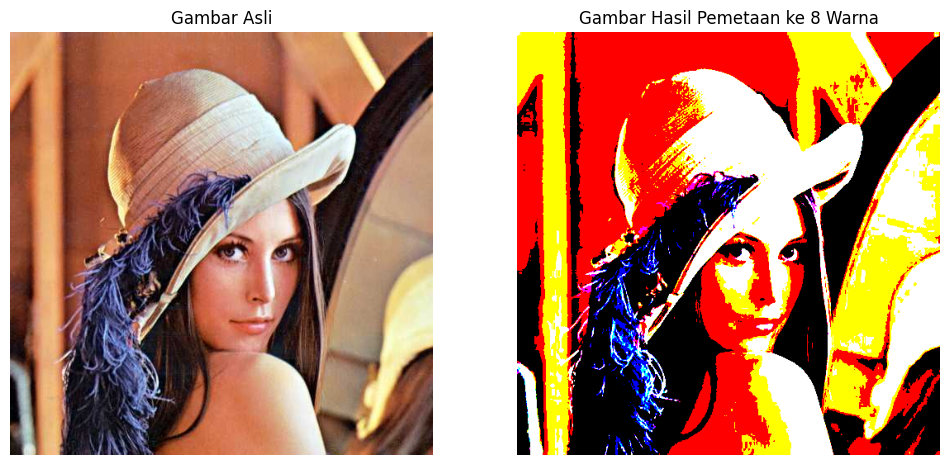

In [8]:
lena_original = cv.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/lena.jpg')
image_rgb = cv.cvtColor(lena_original, cv.COLOR_BGR2RGB)

palette = {
    'black': np.array([0, 0, 0]),
    'red': np.array([255, 0, 0]),
    'green': np.array([0, 255, 0]),
    'yellow': np.array([255, 255, 0]),
    'blue': np.array([0, 0, 255]),
    'cyan': np.array([0, 255, 255]),
    'magenta': np.array([255, 0, 255]),
    'white': np.array([255, 255, 255])
}

def find_nearest_color(pixel, palette):
    min_dist = float('inf')
    nearest_color = None
    for color_name, color_value in palette.items():
        dist = np.linalg.norm(pixel - color_value)
        if dist < min_dist:
            min_dist = dist
            nearest_color = color_value
    return nearest_color

result_image = np.zeros_like(image_rgb)

rows, cols, _ = image_rgb.shape
for i in range(rows):
    for j in range(cols):
        pixel = image_rgb[i, j]
        new_color = find_nearest_color(pixel, palette)
        result_image[i, j] = new_color

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_image)
plt.title('Gambar Hasil Pemetaan ke 8 Warna')
plt.axis('off')

plt.show()


8. Dithering Floyd and Steinberg

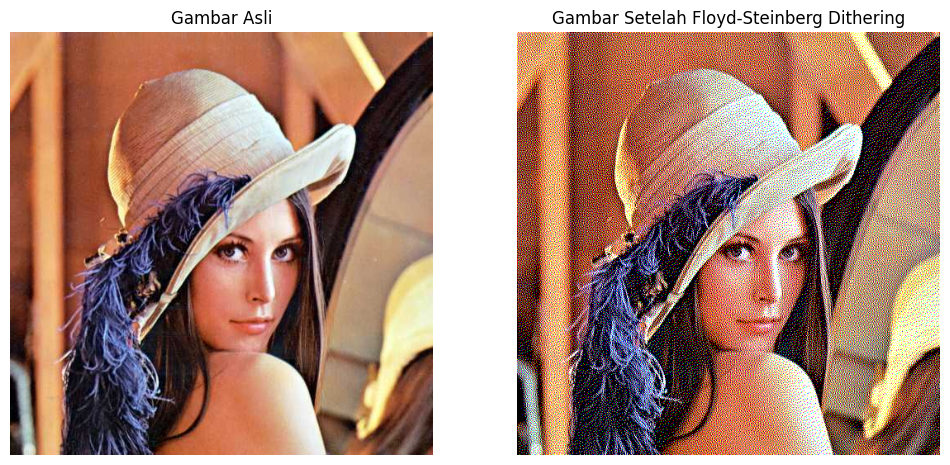

In [10]:
lena_original = cv.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/lena.jpg')
img_rgb = cv.cvtColor(lena_original, cv.COLOR_BGR2RGB)

def floyd_steinberg_dithering_channel(channel):
    h, w = channel.shape
    dithered_channel = channel.copy().astype(float)

    for y in range(h):
        for x in range(w):
            old_pixel = dithered_channel[y, x]
            new_pixel = 255 if old_pixel > 127 else 0  # Thresholding
            dithered_channel[y, x] = new_pixel
            quant_error = old_pixel - new_pixel  # Menghitung error kuantisasi

            if x + 1 < w:  # Piksel kanan
                dithered_channel[y, x + 1] += quant_error * 7 / 16
            if x - 1 >= 0 and y + 1 < h:  # Piksel kiri bawah
                dithered_channel[y + 1, x - 1] += quant_error * 3 / 16
            if y + 1 < h:  # Piksel bawah
                dithered_channel[y + 1, x] += quant_error * 5 / 16
            if x + 1 < w and y + 1 < h:  # Piksel kanan bawah
                dithered_channel[y + 1, x + 1] += quant_error * 1 / 16

    return np.clip(dithered_channel, 0, 255).astype(np.uint8)

r, g, b = cv.split(img_rgb)

# Ditheringkan setiap channel menggunakan Floyd-Steinberg dithering
dithered_r = floyd_steinberg_dithering_channel(r)
dithered_g = floyd_steinberg_dithering_channel(g)
dithered_b = floyd_steinberg_dithering_channel(b)

dithered_rgb = cv.merge((dithered_r, dithered_g, dithered_b))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gambar Setelah Floyd-Steinberg Dithering")
plt.imshow(dithered_rgb)
plt.axis('off')

plt.show()


Nomor 9

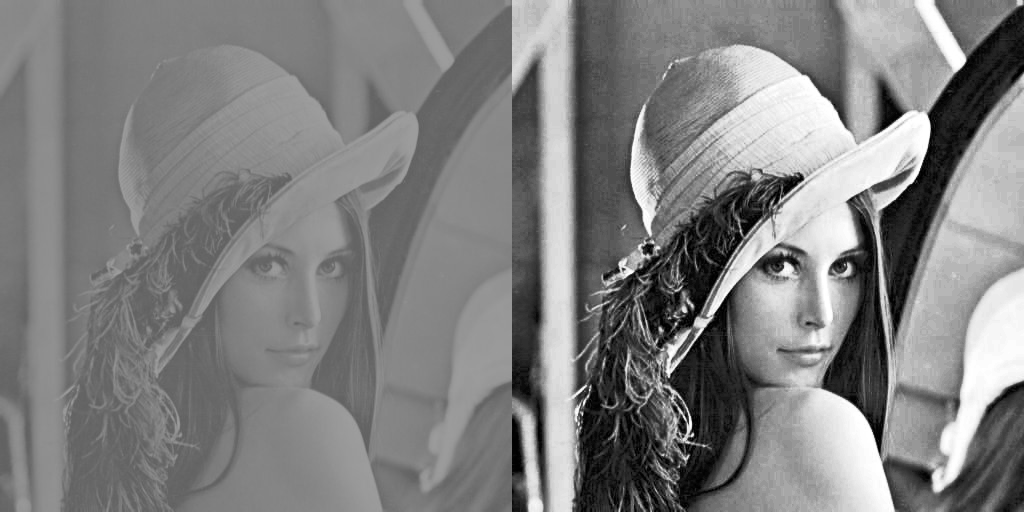

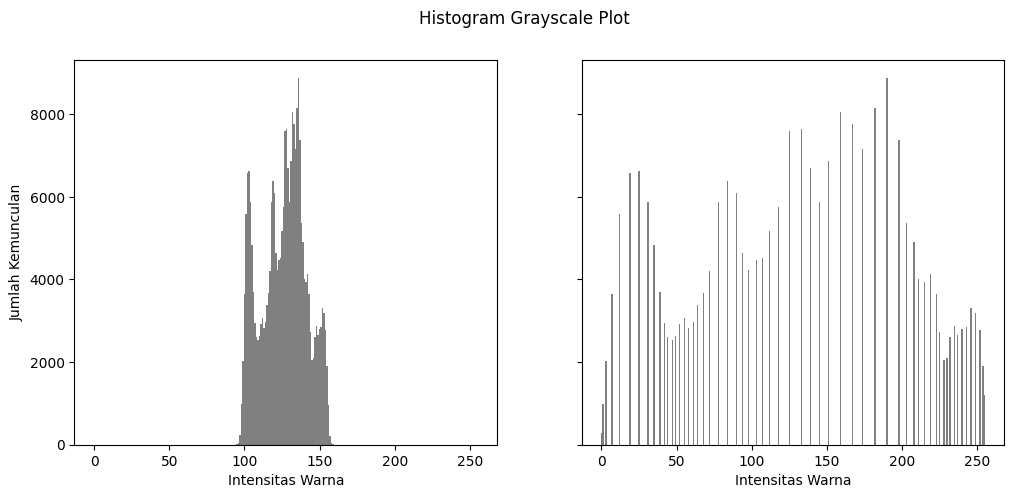

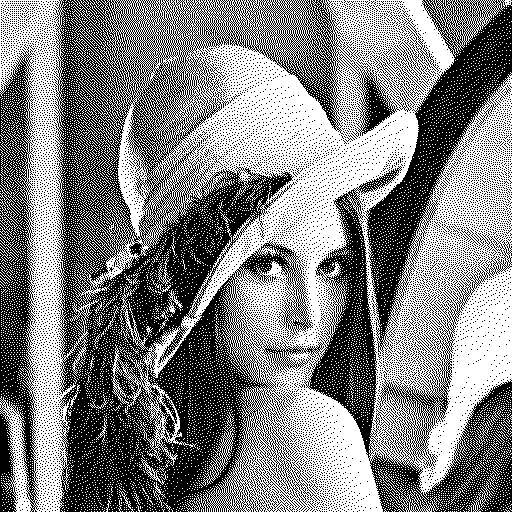

In [11]:
lena_lc_original = cv.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/lena_lc.jpg')
gray_img = cv.cvtColor(lena_lc_original, cv.COLOR_BGR2GRAY)

def calculate_histogram(image):
    hist = cv.calcHist([image], [0], None, [256], [0, 256])
    return hist

def floyd_steinberg_dithering(img):
    img = img.astype(float) / 255.0  # Normalize to [0, 1]
    height, width = img.shape

    for y in range(height):
        for x in range(width):
            old_pixel = img[y, x]
            new_pixel = round(old_pixel)  # Dither to 0 or 1
            img[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            if x < width - 1:
                img[y, x + 1] += quant_error * 7 / 16
            if y < height - 1:
                if x > 0:
                    img[y + 1, x - 1] += quant_error * 3 / 16
                img[y + 1, x] += quant_error * 5 / 16
                if x < width - 1:
                    img[y + 1, x + 1] += quant_error * 1 / 16

    return (img * 255).astype(np.uint8)

hist_before = calculate_histogram(gray_img)

equalized_img = cv.equalizeHist(gray_img)

hist_after = calculate_histogram(equalized_img)

dithered_img = floyd_steinberg_dithering(equalized_img)

final_frame = cv.hconcat((gray_img, equalized_img))
cv2_imshow(final_frame)

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Histogram Grayscale Plot")

axs[0].bar(np.arange(256), hist_before[:, 0], color='gray')
axs[0].set_xlabel('Intensitas Warna')
axs[0].set_ylabel('Jumlah Kemunculan')

axs[1].bar(np.arange(256), hist_after[:, 0], color='gray')
axs[1].set_xlabel('Intensitas Warna')

plt.show()

cv2_imshow(dithered_img)